# Stock Market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime

company_name='voltas'

def open_data(name):
    return 'Updated_Stock_market_data\\'+name.upper()+'__EQ__NSE__NSE__MINUTE.csv'

dp=pd.read_csv(open_data(company_name))

In [2]:
dp

,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,early morning,324.90,327.70,324.90,324.90,5200.0,0.000000,324.900000
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,early morning,325.25,327.75,324.85,326.75,8555.0,0.569406,325.825000
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,early morning,326.75,326.75,325.80,326.15,3144.0,-0.183627,325.933333
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,early morning,326.15,326.30,325.95,326.30,4460.0,0.045991,326.025000
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,early morning,326.30,327.00,326.30,326.80,1577.0,0.153233,326.180000
...,...,...,...,...,...,...,...,...,...,...,...
370540,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,afternoon,832.15,832.40,832.00,832.00,1458.0,-0.018026,576.900303
370541,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,afternoon,832.40,832.40,831.95,831.95,1852.0,-0.006010,576.900992
370542,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,afternoon,831.95,831.95,831.50,831.65,1026.0,-0.036060,576.901679
370543,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,afternoon,831.65,831.90,831.50,831.85,2486.0,0.024049,576.902367


In [3]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370545 non-null  object 
 1   date       370545 non-null  object 
 2   time       370545 non-null  object 
 3   quater     370545 non-null  object 
 4   open       370404 non-null  float64
 5   high       370404 non-null  float64
 6   low        370404 non-null  float64
 7   close      370404 non-null  float64
 8   volume     370404 non-null  float64
 9   %change    370394 non-null  float64
 10  MA         370545 non-null  float64
dtypes: float64(7), object(4)
memory usage: 31.1+ MB


In [4]:
dp['timestamp'] = pd.to_datetime(dp['timestamp'],format='%Y-%m-%d %H:%M:%S%z')
dp['date']=pd.to_datetime(dp['date'])
dp['time'] = pd.to_datetime(dp['time'],format='%H:%M:%S').dt.time
dp['quater']=dp['quater'].astype('string')

In [5]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype                                
---  ------     --------------   -----                                
 0   timestamp  370545 non-null  datetime64[ns, pytz.FixedOffset(330)]
 1   date       370545 non-null  datetime64[ns]                       
 2   time       370545 non-null  object                               
 3   quater     370545 non-null  string                               
 4   open       370404 non-null  float64                              
 5   high       370404 non-null  float64                              
 6   low        370404 non-null  float64                              
 7   close      370404 non-null  float64                              
 8   volume     370404 non-null  float64                              
 9   %change    370394 non-null  float64                              
 10  MA         370545 non-null  floa

In [6]:
dp.describe()

,open,high,low,close,volume,%change,MA
count,370404.000000,370404.000000,370404.000000,370404.000000,3.704040e+05,370394.000000,370545.000000
mean,576.910366,577.274872,576.543220,576.908838,4.353003e+03,0.000321,503.909138
std,98.796054,98.842286,98.750395,98.796100,1.074773e+04,0.117857,67.078504
min,320.800000,321.450000,320.500000,320.900000,0.000000e+00,-8.069187,324.900000
25%,525.850000,526.200000,525.500000,525.850000,8.640000e+02,-0.046438,477.021871
50%,583.550000,583.950000,583.100000,583.550000,2.022000e+03,0.000000,527.130496
75%,638.100000,638.450000,637.750000,638.100000,4.550000e+03,0.046154,556.955744
max,844.750000,844.950000,843.950000,844.750000,1.350061e+06,7.930439,576.903054


In [7]:
dp.isnull().sum()

timestamp      0
date           0
time           0
quater         0
open         141
high         141
low          141
close        141
volume       141
%change      151
MA             0
dtype: int64

In [8]:
dp[dp.isna().any(axis=1)]

,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
215836,2019-05-06 14:01:00+05:30,2019-05-06,14:01:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,533.577293
215837,2019-05-06 14:02:00+05:30,2019-05-06,14:02:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,533.577293
215838,2019-05-06 14:03:00+05:30,2019-05-06,14:03:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,533.577293
215839,2019-05-06 14:04:00+05:30,2019-05-06,14:04:00,afternoon,606.95,607.00,606.5,607.0,937.0,NaN,533.577633
239459,2019-08-02 13:59:00+05:30,2019-08-02,13:59:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,539.957788
...,...,...,...,...,...,...,...,...,...,...,...
337678,2020-08-27 12:28:00+05:30,2020-08-27,12:28:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,562.034433
337679,2020-08-27 12:29:00+05:30,2020-08-27,12:29:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,562.034433
337680,2020-08-27 12:30:00+05:30,2020-08-27,12:30:00,afternoon,664.60,664.85,664.1,664.5,32307.0,NaN,562.034736
355092,2020-11-02 15:12:00+05:30,2020-11-02,15:12:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,567.641860


In [9]:
#Cleaning NULL of open,close,high,low
for i in dp.index:
    if math.isnan(dp.loc[i,'open']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'open'])==True):
            j-=1
        dp.loc[i,'open']=dp.loc[j,'open']
    if math.isnan(dp.loc[i,'close']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'close'])==True):
            j-=1
        dp.loc[i,'close']=dp.loc[j,'close']
    if math.isnan(dp.loc[i,'high']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'high'])==True):
            j-=1
        dp.loc[i,'high']=dp.loc[j,'high']
    if math.isnan(dp.loc[i,'low']):
        j=i-1
        while(j>0 and math.isnan(dp.loc[j,'low'])==True):
            j-=1
        dp.loc[i,'low']=dp.loc[j,'low']

In [10]:
#Cleaning NULL of volume
dp['volume'].fillna(0,inplace=True)

In [11]:
#Cleaning NULL of %Chnage
#%Change=(curr_close-prev_close)/prev_close*100
#Recalculate change for NULL values
for i in dp.index:
    if math.isnan(dp.loc[i,'%change']):
        dp.loc[i,'%change']=(dp.loc[i,'close']-dp.loc[i-1,'close'])/dp.loc[i-1,'close']*100        

In [12]:
dp.isnull().sum()

timestamp    0
date         0
time         0
quater       0
open         0
high         0
low          0
close        0
volume       0
%change      0
MA           0
dtype: int64

In [13]:
print("Maximum stock price of",company_name,"is",dp['high'].max())
print("Minimum stock price of",company_name,"is",dp['low'].min())
print("Maximum stocks purchased at a time of",company_name,"is",dp['volume'].max())
print("Minimum stocks purchased at a time of",company_name,"is",dp['volume'].min())

Maximum stock price of voltas is 844.95
Minimum stock price of voltas is 320.5
Maximum stocks purchased at a time of voltas is 1350061.0
Minimum stocks purchased at a time of voltas is 0.0


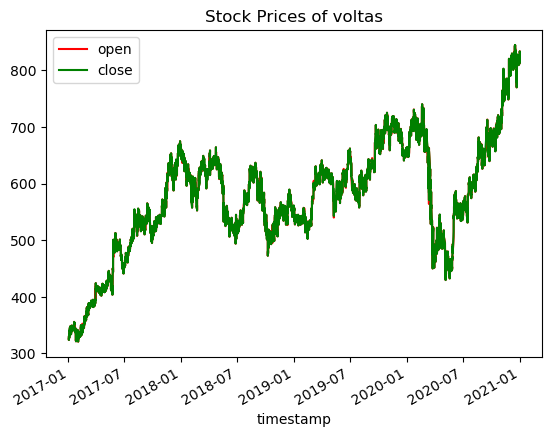

In [14]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='open',color='red',ax=ax)
dp.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

In [15]:
def get_date(date):
    return np.datetime64(datetime.strptime(date, "%Y-%m-%d").date())

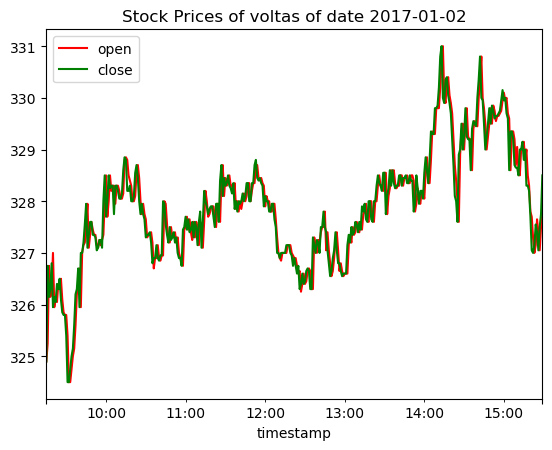

In [16]:
day=get_date('2017-01-02')

dp_day = dp[dp['date'] == day]

fig, ax = plt.subplots()
dp_day.plot(x='timestamp',y='open',color='red',ax=ax)
dp_day.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name+' of date '+str(day))
plt.show()

In [17]:
# Convert the datetime object to an integer timestamp
dp['int_timestamp'] = dp['timestamp'].apply(lambda x: int(x.timestamp()))

In [18]:
for i in dp.index:
    if dp.loc[i,'%change'] > 0:
        dp.loc[i,'target']=1
    else:
        dp.loc[i,'target']=0

In [19]:
corr = dp.corr(method = 'pearson')
corr

C:\Users\Shivan\AppData\Local\Temp\ipykernel_20584\3384302169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dp.corr(method = 'pearson')


,open,high,low,close,volume,%change,MA,int_timestamp,target
open,1.000000,0.999988,0.999988,0.999980,-0.006223,-0.003050,0.741566,0.667424,0.007972
high,0.999988,1.000000,0.999981,0.999990,-0.004847,-0.000184,0.741943,0.667827,0.010139
low,0.999988,0.999981,1.000000,0.999989,-0.007351,-0.000210,0.741170,0.667037,0.009800
close,0.999980,0.999990,0.999989,1.000000,-0.005999,0.002471,0.741550,0.667417,0.011791
volume,-0.006223,-0.004847,-0.007351,-0.005999,1.000000,0.043046,0.024316,0.048766,0.027173
%change,-0.003050,-0.000184,-0.000210,0.002471,0.043046,1.000000,-0.001939,-0.000575,0.598275
MA,0.741566,0.741943,0.741170,0.741550,0.024316,-0.001939,1.000000,0.899287,0.016018
int_timestamp,0.667424,0.667827,0.667037,0.667417,0.048766,-0.000575,0.899287,1.000000,0.013523
target,0.007972,0.010139,0.009800,0.011791,0.027173,0.598275,0.016018,0.013523,1.000000


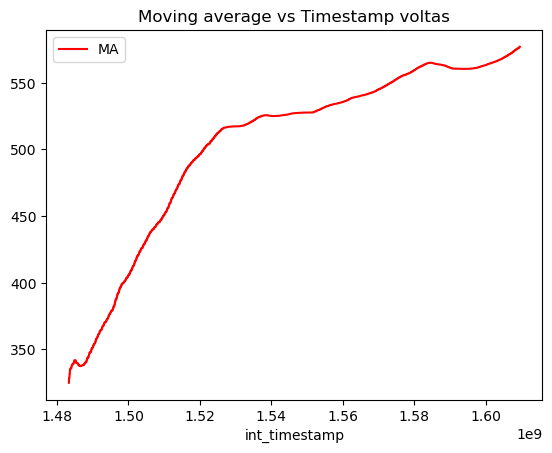

In [20]:
fig, ax = plt.subplots()

dp.plot(x='int_timestamp',y='MA',color='red',ax=ax)

plt.title('Moving average vs Timestamp '+company_name)
plt.show()

In [58]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
X_1=dp[['int_timestamp']]
Y_1=dp['MA']
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1,Y_1,test_size=0.2, random_state=42)

In [23]:
linear_1=LinearRegression()
linear_1.fit(X_1_train,Y_1_train)

LinearRegression()

In [24]:
X_2=dp[['int_timestamp','MA']]
Y_2=dp['open']
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2,Y_2,test_size=0.2, random_state=42)

In [25]:
linear_2=LinearRegression()
linear_2.fit(X_2_train,Y_2_train)

LinearRegression()

In [26]:
X_3=dp[['int_timestamp','MA','open']]
Y_3=dp['close']
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3,Y_3,test_size=0.2, random_state=42)

In [27]:
linear_3=LinearRegression()
linear_3.fit(X_3_train,Y_3_train)

LinearRegression()

In [28]:
X_4=dp[['int_timestamp','MA','open','close']]
Y_4=dp['high']
X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4,Y_4,test_size=0.2, random_state=42)

In [29]:
linear_4=LinearRegression()
linear_4.fit(X_4_train,Y_4_train)

LinearRegression()

In [30]:
X_5=dp[['int_timestamp','MA','open','close','high']]
Y_5=dp['low']
X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5,Y_5,test_size=0.2, random_state=42)

In [31]:
linear_5=LinearRegression()
linear_5.fit(X_5_train,Y_5_train)

LinearRegression()

In [61]:
Y_1_pred = linear_1.predict(X_1_test)
Y_2_pred = linear_2.predict(X_2_test)
Y_3_pred = linear_3.predict(X_3_test)
Y_4_pred = linear_4.predict(X_4_test)
Y_5_pred = linear_5.predict(X_5_test)

In [63]:
Y1_mse=mean_squared_error(Y_1_test,Y_1_pred)
Y2_mse=mean_squared_error(Y_2_test,Y_2_pred)
Y3_mse=mean_squared_error(Y_3_test,Y_3_pred)
Y4_mse=mean_squared_error(Y_4_test,Y_4_pred)
Y5_mse=mean_squared_error(Y_5_test,Y_5_pred)
print("Mean Square Error for MA:",Y1_mse)
print("Mean Square Error for open:",Y2_mse)
print("Mean Square Error for close:",Y3_mse)
print("Mean Square Error for high:",Y4_mse)
print("Mean Square Error for low:",Y5_mse)

Mean Square Error for MA: 860.0725246689019
Mean Square Error for open: 4417.0034610811545
Mean Square Error for close: 0.3874241198421644
Mean Square Error for high: 0.11758712705116085
Mean Square Error for low: 0.090177320054081


In [32]:
specific_date = '2021-07-14'
specific_time = '15:30:00'

In [33]:
#timestamp='2019-05-06 14:01:00+05:30'
timestamp_str=specific_date+' '+specific_time+'+05:30'
timestamp=pd.to_datetime(timestamp_str)
int_timestamp = int(timestamp.timestamp())

In [34]:
test_value = pd.DataFrame({'int_timestamp': [int_timestamp]})
test_value

,int_timestamp
0,1626256800


In [35]:
predicted_ma = linear_1.predict(test_value)
test_value['MA']=predicted_ma
predicted_open = linear_2.predict(test_value)
test_value['open']=predicted_open
predicted_close = linear_3.predict(test_value)
test_value['close']=predicted_close
predicted_high = linear_4.predict(test_value)
test_value['high']=predicted_high
predicted_low = linear_5.predict(test_value)
test_value['low']=predicted_low

# Print the predicted values
print("Predicted Open:", predicted_open)
print("Predicted High:", predicted_high)
print("Predicted Low:", predicted_low)
print("Predicted Close:", predicted_close)

Predicted Open: [721.04914897]
Predicted High: [721.5687125]
Predicted Low: [720.53496539]
Predicted Close: [721.0484789]


In [36]:
df=dp[['int_timestamp']]
predicted_ma = linear_1.predict(dp[['int_timestamp']])
df['MA']=predicted_ma
predicted_open = linear_2.predict(df)
df['open']=predicted_open
predicted_close = linear_3.predict(df)
df['close']=predicted_close
predicted_high = linear_4.predict(df)
df['high']=predicted_high
predicted_low = linear_5.predict(df)
df['low']=predicted_low
df['timestamp']=dp['timestamp']

C:\Users\Shivan\AppData\Local\Temp\ipykernel_20584\2426489568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA']=predicted_ma
C:\Users\Shivan\AppData\Local\Temp\ipykernel_20584\2426489568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open']=predicted_open
C:\Users\Shivan\AppData\Local\Temp\ipykernel_20584\2426489568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [37]:
df

,int_timestamp,MA,open,close,high,low,timestamp
0,1483328700,399.858367,463.133726,463.131956,463.375421,462.883938,2017-01-02 09:15:00+05:30
1,1483328760,399.858466,463.133834,463.132064,463.375530,462.884047,2017-01-02 09:16:00+05:30
2,1483328820,399.858565,463.133942,463.132172,463.375638,462.884155,2017-01-02 09:17:00+05:30
3,1483328880,399.858664,463.134050,463.132280,463.375746,462.884263,2017-01-02 09:18:00+05:30
4,1483328940,399.858763,463.134159,463.132389,463.375855,462.884371,2017-01-02 09:19:00+05:30
...,...,...,...,...,...,...,...
370540,1609494900,607.788482,690.802105,690.801306,691.289081,690.318928,2021-01-01 15:25:00+05:30
370541,1609494960,607.788581,690.802213,690.801414,691.289190,690.319037,2021-01-01 15:26:00+05:30
370542,1609495020,607.788680,690.802321,690.801522,691.289298,690.319145,2021-01-01 15:27:00+05:30
370543,1609495080,607.788778,690.802430,690.801631,691.289407,690.319253,2021-01-01 15:28:00+05:30


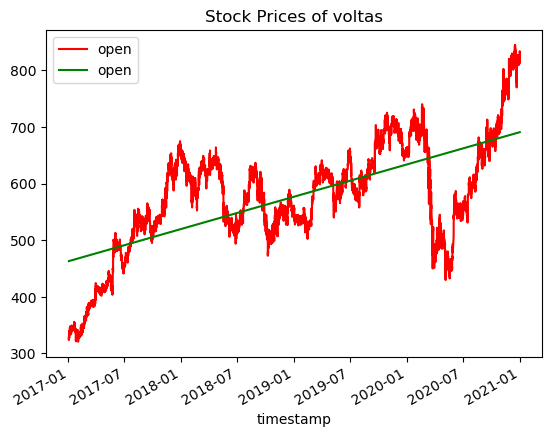

In [38]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='open',color='red',ax=ax)
df.plot(x='timestamp',y='open',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

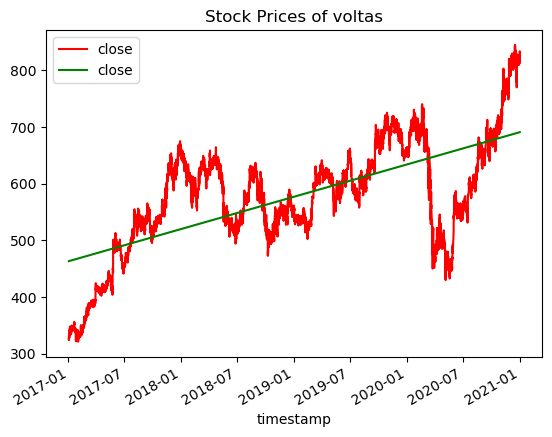

In [39]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='close',color='red',ax=ax)
df.plot(x='timestamp',y='close',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

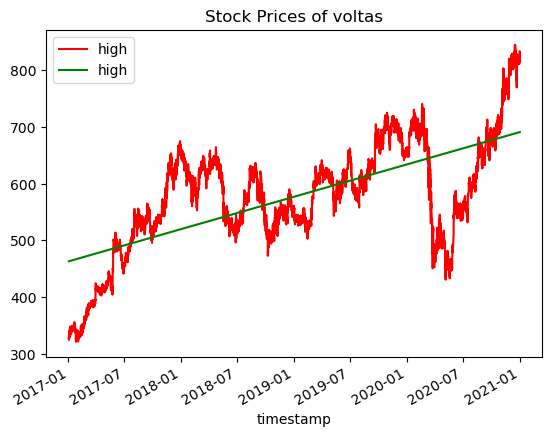

In [40]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='high',color='red',ax=ax)
df.plot(x='timestamp',y='high',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

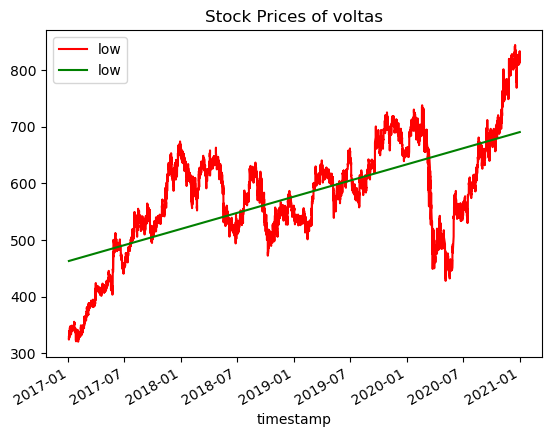

In [41]:
fig, ax = plt.subplots()

dp.plot(x='timestamp',y='low',color='red',ax=ax)
df.plot(x='timestamp',y='low',color='green',ax=ax)

plt.title('Stock Prices of '+company_name)
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Should buy or not using logistic regression
X_target=dp[['int_timestamp','MA','open','close','high','low']]
Y_target=dp['target']
X_train,X_test,Y_train,Y_test=train_test_split(X_target,Y_target,test_size=0.2,random_state=42)

In [44]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=16)

In [45]:
specific_date = '2021-07-14'
specific_time = '15:30:00'
#timestamp='2019-05-06 14:01:00+05:30'
timestamp_str=specific_date+' '+specific_time+'+05:30'
timestamp=pd.to_datetime(timestamp_str)
int_timestamp = int(timestamp.timestamp())
test_value = pd.DataFrame({'int_timestamp': [int_timestamp]})
test_value

,int_timestamp
0,1626256800


In [46]:
predicted_ma = linear_1.predict(test_value)
test_value['MA']=predicted_ma
predicted_open = linear_2.predict(test_value)
test_value['open']=predicted_open
predicted_close = linear_3.predict(test_value)
test_value['close']=predicted_close
predicted_high = linear_4.predict(test_value)
test_value['high']=predicted_high
predicted_low = linear_5.predict(test_value)
test_value['low']=predicted_low
predicted_target=logreg.predict(test_value)


# Print the predicted values
print("Predicted Open:", predicted_open)
print("Predicted High:", predicted_high)
print("Predicted Low:", predicted_low)
print("Predicted Close:", predicted_close)
print("Predicted Target:", predicted_target)

Predicted Open: [721.04914897]
Predicted High: [721.5687125]
Predicted Low: [720.53496539]
Predicted Close: [721.0484789]
Predicted Target: [0.]
